In [1]:
## LDA (Linear Discriminant Analysis)

import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt



## Read in Training and Test datasets
df1 = pd.read_csv('/Users/afarinnava/Desktop/Python Machine Learning/ML_HW2/optdigits.tra', header = None) 
df2 = pd.read_csv('/Users/afarinnava/Desktop/Python Machine Learning/ML_HW2/optdigits.tes', header = None) 

# Subset of train dataset
df_train = df1.iloc[:, 0:64]
#print(df_train.shape)

# Drop columns with all zeros 0 and 39
df_train.drop([df_train.columns[0] , df_train.columns[39]] ,  axis='columns', inplace = True)
#print(df_train.shape)
# Subset of test dataset
df_test = df2.iloc[:, 0:64]
# Drop columns with all zeros 0, 32 and 39
df_test.drop([df_test.columns[0] , df_test.columns[32], df_test.columns[39]] ,  axis='columns', inplace = True)

# Store the target value
classes = df1.iloc[:, 64]  
df = df_train.join(pd.Series(classes, name = 'class'))
#df = df_train.join(pd.Series(classes))
#print(df.shape)
#print(type(df))

# Convert dataframe into list
data_train = df_train.values.tolist() 

data_test = df_test.values.tolist() 

dataList = [data_train, data_test]

# training set
#A = np.array(df)
# calculate the mean of each column
####M = mean(A, axis=0)


wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

#labels = Series.unique(classes)
#labels = df[:,64].unique()
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#X.shape
#X.head()
###wine.target_names
#######.  df = X.join(pd.Series(y, name='class'))
#df.head(34)
## Within Class Scatter Matrix
#### Create a vector with the means of each feature
##class_feature_means = pd.DataFrame(columns=wine.target_names)
class_feature_means = pd.DataFrame(columns= labels)
#print(class_feature_means.shape)
for c, rows in df.groupby('class'):
#for c, rows in df.groupby(classes):
    class_feature_means[c] = rows.mean()
##class_feature_means = df.mean(axis = 0)
class_feature_means = class_feature_means.iloc[0:62,:]
print(class_feature_means.shape)
#print(class_feature_means)


## Plug the mean vectors (mi) into the equation to obtain the within class scatter matrix
within_class_scatter_matrix = np.zeros((62,62))
for c, rows in df.groupby('class'):
#for c, rows in df.groupby(classes):
    rows = rows.drop(['class'], axis=1)
    #rows = rows.drop([classes], axis=1)
    s = np.zeros((62,62))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(62,1), class_feature_means[c].values.reshape(62,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
    
## Between Class Scatter Matrix
feature_means = df.mean()
feature_means = feature_means.iloc[0:62]
print('feature_means:', feature_means.shape)
between_class_scatter_matrix = np.zeros((62,62))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(62,1), feature_means.values.reshape(62,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
    
### Solve the generalized eigenvalue problem to obtain the linear discriminants
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
### Sort the eigenvalues and select the first k eigenvectors
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])
    
## Express it as a percentage
eigen_value_sums = sum(eigen_values)
#print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
    
## Create a matrix W with the first two eigenvectors
w_matrix = np.hstack((pairs[0][1].reshape(62,1), pairs[1][1].reshape(62,1))).real

## Save the dot product of X and W into a new matrix Y. 
## Y is composed of the LDA components,i.e. the new feature space
X_lda = np.array(df_train.dot(w_matrix))

## Encode every class as a number so that we can incorporate the class labels into our plot
le = LabelEncoder()
y = le.fit_transform(df['class'])

## plot the data as a function of the two LDA components and use a different color for each class
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_lda[0:100,0], X_lda[0:100,1])
#print(classes[0:100])
#for i, txt in enumerate(classes[0:100]):
for i, txt in enumerate(y[0:100]):
    ax.annotate(txt, (X_lda[i,0], X_lda[i,1]))
plt.title('Optdigits after LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
#plt.scatter( X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow', alpha=0.7,edgecolors='b')

plt.show()



#plt.xlabel('First eigenvector')
#plt.ylabel('Second eigenvector')



/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NameError: name 'load_wine' is not defined

9.884546449232964
2.903361061716055
8.328748314463861e-16
8.328748314463861e-16
4.886713002064387e-16
4.489875014453336e-16
3.4635722681863882e-16
3.4635722681863882e-16
1.0056538289828519e-16
7.842049664151311e-17
7.842049664151311e-17
5.900795033178523e-17
0.0
Explained Variance
Eigenvector 0: 0.7729604269322252
Eigenvector 1: 0.2270395730677747
Eigenvector 2: 6.51298760749777e-17
Eigenvector 3: 6.51298760749777e-17
Eigenvector 4: 3.821354664850663e-17
Eigenvector 5: 3.511031817057716e-17
Eigenvector 6: 2.7084746001023813e-17
Eigenvector 7: 2.7084746001023813e-17
Eigenvector 8: 7.864099956320532e-18
Eigenvector 9: 6.132394731066783e-18
Eigenvector 10: 6.132394731066783e-18
Eigenvector 11: 4.614355419857593e-18
Eigenvector 12: 0.0


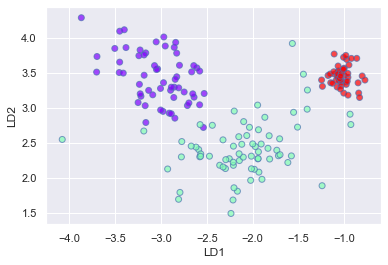

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

#X.shape
#X.head()
wine.target_names
df = X.join(pd.Series(y, name='class'))
#df.head(34)
## Within Class Scatter Matrix
#### Create a vector with the means of each feature
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
#class_feature_means

## Plug the mean vectors (mi) into the equation to obtain the within class scatter matrix
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
    
## Between Class Scatter Matrix
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
    
### Solve the generalized eigenvalue problem to obtain the linear discriminants
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
### Sort the eigenvalues and select the first k eigenvectors
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])
    
## Express it as a percentage
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
    
## Create a matrix W with the first two eigenvectors
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

## Save the dot product of X and W into a new matrix Y. 
## Y is composed of the LDA components,i.e. the new feature space
X_lda = np.array(X.dot(w_matrix))

## Encode every class as a number so that we can incorporate the class labels into our plot
le = LabelEncoder()
y = le.fit_transform(df['class'])

## plot the data as a function of the two LDA components and use a different color for each class
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

(178, 14)
(0, 3)
(13, 3)
                                  class_0     class_1     class_2
alcohol                         13.744746   12.278732   13.153750
malic_acid                       2.010678    1.932676    3.333750
ash                              2.455593    2.244789    2.437083
alcalinity_of_ash               17.037288   20.238028   21.416667
magnesium                      106.338983   94.549296   99.312500
total_phenols                    2.840169    2.258873    1.678750
flavanoids                       2.982373    2.080845    0.781458
nonflavanoid_phenols             0.290000    0.363662    0.447500
proanthocyanins                  1.899322    1.630282    1.153542
color_intensity                  5.528305    3.086620    7.396250
hue                              1.062034    1.056282    0.682708
od280/od315_of_diluted_wines     3.157797    2.785352    1.683542
proline                       1115.711864  519.507042  629.895833
(178, 14)
feature_means: (13,)
9.081739435042472
4.

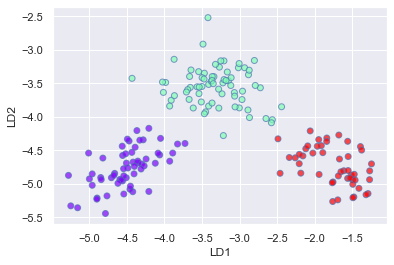

In [113]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

#X.shape
#X.head()
wine.target_names
df = X.join(pd.Series(y, name='class'))
print(df.shape)
#print(df.head())
## Within Class Scatter Matrix
#### Create a vector with the means of each feature
class_feature_means = pd.DataFrame(columns=wine.target_names)
print(class_feature_means.shape)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
#class_feature_means
print(class_feature_means.shape)
print(class_feature_means)

## Plug the mean vectors (mi) into the equation to obtain the within class scatter matrix
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
    
## Between Class Scatter Matrix
print(df.shape)
feature_means = df.mean()
print('feature_means:', feature_means.shape)
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
    
### Solve the generalized eigenvalue problem to obtain the linear discriminants
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
### Sort the eigenvalues and select the first k eigenvectors
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])
    
## Express it as a percentage
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
    
## Create a matrix W with the first two eigenvectors
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

## Save the dot product of X and W into a new matrix Y. 
## Y is composed of the LDA components,i.e. the new feature space
X_lda = np.array(X.dot(w_matrix))

## Encode every class as a number so that we can incorporate the class labels into our plot
le = LabelEncoder()
y = le.fit_transform(df['class'])

## plot the data as a function of the two LDA components and use a different color for each class
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

(62, 10)
feature_means: (62,)
6.940546752947328
5.423527821361576
4.30983126055072
3.0080481931641483
2.609464132609771
1.526184489797743
1.2541641847089402
0.7356271678435238
0.49641075938420665
2.189630530767007e-15
2.189630530767007e-15
2.041575530100816e-15
2.041575530100816e-15
1.7616673543458613e-15
1.7616673543458613e-15
1.6562516599393525e-15
1.6562516599393525e-15
1.6126735606380863e-15
1.511628302739788e-15
1.511628302739788e-15
1.4880205978993785e-15
1.4880205978993785e-15
1.3122570280799844e-15
1.2695560968848397e-15
1.176834448287676e-15
1.176834448287676e-15
1.1759530114552123e-15
1.1759530114552123e-15
1.152197672469001e-15
1.1082940791578324e-15
1.1082940791578324e-15
1.0563645044833027e-15
1.0563645044833027e-15
9.09986878720882e-16
9.09986878720882e-16
8.711088481155693e-16
8.711088481155693e-16
8.707176827562725e-16
7.922341927615667e-16
7.922341927615667e-16
6.611137480429692e-16
6.491891851921161e-16
5.606176833639802e-16
5.606176833639802e-16
5.485135580844831e-16

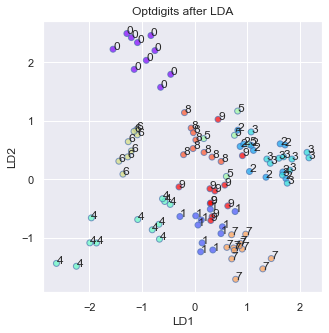

In [142]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



## Read in Training and Test datasets
df1 = pd.read_csv('/Users/afarinnava/Desktop/Python Machine Learning/ML_HW2/optdigits.tra', header = None) 
df2 = pd.read_csv('/Users/afarinnava/Desktop/Python Machine Learning/ML_HW2/optdigits.tes', header = None) 

# Subset of train dataset
df_train = df1.iloc[:, 0:64]
#print(df_train.shape)

# Drop columns with all zeros 0 and 39
df_train.drop([df_train.columns[0] , df_train.columns[39]] ,  axis='columns', inplace = True)
#print(df_train.shape)
# Subset of test dataset
df_test = df2.iloc[:, 0:64]
# Drop columns with all zeros 0, 32 and 39
df_test.drop([df_test.columns[0] , df_test.columns[32], df_test.columns[39]] ,  axis='columns', inplace = True)

# Store the target value
classes = df1.iloc[:, 64]  
df = df_train.join(pd.Series(classes, name = 'class'))
#df = df_train.join(pd.Series(classes))
#print(df.shape)
#print(type(df))

# Convert dataframe into list
data_train = df_train.values.tolist() 

data_test = df_test.values.tolist() 

dataList = [data_train, data_test]

# training set
#A = np.array(df)
# calculate the mean of each column
####M = mean(A, axis=0)


wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

#labels = Series.unique(classes)
#labels = df[:,64].unique()
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#X.shape
#X.head()
###wine.target_names
#######.  df = X.join(pd.Series(y, name='class'))
#df.head(34)
## Within Class Scatter Matrix
#### Create a vector with the means of each feature
##class_feature_means = pd.DataFrame(columns=wine.target_names)
class_feature_means = pd.DataFrame(columns= labels)
#print(class_feature_means.shape)
for c, rows in df.groupby('class'):
#for c, rows in df.groupby(classes):
    class_feature_means[c] = rows.mean()
##class_feature_means = df.mean(axis = 0)
class_feature_means = class_feature_means.iloc[0:62,:]
print(class_feature_means.shape)
#print(class_feature_means)


## Plug the mean vectors (mi) into the equation to obtain the within class scatter matrix
within_class_scatter_matrix = np.zeros((62,62))
for c, rows in df.groupby('class'):
#for c, rows in df.groupby(classes):
    rows = rows.drop(['class'], axis=1)
    #rows = rows.drop([classes], axis=1)
    s = np.zeros((62,62))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(62,1), class_feature_means[c].values.reshape(62,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
    
## Between Class Scatter Matrix
feature_means = df.mean()
feature_means = feature_means.iloc[0:62]
print('feature_means:', feature_means.shape)
between_class_scatter_matrix = np.zeros((62,62))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(62,1), feature_means.values.reshape(62,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
    
### Solve the generalized eigenvalue problem to obtain the linear discriminants
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
### Sort the eigenvalues and select the first k eigenvectors
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])
    
## Express it as a percentage
eigen_value_sums = sum(eigen_values)
#print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
    
## Create a matrix W with the first two eigenvectors
w_matrix = np.hstack((pairs[0][1].reshape(62,1), pairs[1][1].reshape(62,1))).real

## Save the dot product of X and W into a new matrix Y. 
## Y is composed of the LDA components,i.e. the new feature space
X_lda = np.array(df_train.dot(w_matrix))

## Encode every class as a number so that we can incorporate the class labels into our plot
le = LabelEncoder()
y = le.fit_transform(df['class'])

## plot the data as a function of the two LDA components and use a different color for each class
fig, ax = plt.subplots(figsize=(5,5))
#ax.scatter(X_lda[0:100,0], X_lda[0:100,1])
#print(classes[0:100])
#for i, txt in enumerate(classes[0:100]):
for i, txt in enumerate(y[0:100]):
    ax.annotate(txt, (X_lda[i,0], X_lda[i,1]))
plt.title('Optdigits after LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
#plt.scatter( X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow', alpha=0.7,edgecolors='b')

#plt.show()

#plt.xlabel('LD1')
#plt.ylabel('LD2')
plt.scatter(
    X_lda[0:100,0],
    X_lda[0:100,1],
    c=y[0:100],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

#plt.xlabel('First eigenvector')
#plt.ylabel('Second eigenvector')

